<center><h1>Building Deep Neural Networks in Keras</h1></center>
<h3> </h3>
<center><img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" height=50% width = 50%>
</center>

<h3>About this tutorial </h3>

In this tutorial, we'll build our first Deep Neural Network using the <a href="https://keras.io/">Keras Library</a>. In this tutorial, we'll use a basic deep neural network to build an image classifier that can correctly classify handwritten digits.  Along the way, we'll get some practice using numpy to vectorize our inputs and make sure everything is the correct shape.  


<h3>About Keras</h3>
Keras is a cutting-edge Deep Learning Library that provides a clean, high-level API that makes creating Deep Neural Networks easy.  Keras is an open-source project run by Francois Chollet, an AI researcher at Google.  The main benefit of Keras is that it is fast and easy to use, without sacrificing power.  Keras achieves this by acting as a frontend to lower-level libraries such as Tensorflow or Theano.  Tensorflow is the default backend, although you can switch it CNTK or Theano (although, as of this writing, Theano is no longer an active library).  Keras is usually the first library engineers reach for when prototyping a solution, since it's fast and easy to work in.  
<br>
Keras works by allowing users to specify the architecture and characteristics of their neural network, and let Keras do all the heavy lifting.  Typically, each layer only takes one line of code.  Keras also supports advanced architectures, such as Convolutional Neural Networks, Recurrent Neural Networks, and advanced models that even combine the two.  
<br>
Keras comes with full installation instructions on its main page, <a href=https://.keras.io>Keras.io</a>.
</br>
to install keras in bash, simply run `sudo pip install keras`, or, in anaconda, `conda install -c conda-forge keras`.
<br>
<br>
Side note: I highly recommend Francois's blog, <a href="https://blog.keras.io/author/francois-chollet.html">The Keras Blog</a>.  It's filled with great content that any machine learning aficionado will find interesting!
<br>
<h3>About Our Data Set</h3>
<br>
For this tutorial, we'll be making use of the classic MNIST data set.  This is a collection of 60,000 black-and-white, 28px x 28px images of handwritten digits 0-9, as well as labels of the number represented in each image.
<br>
<br>
Let's get started!

<center><h2>Importing what we need</h2></center>

To start off, we'll need to import everything we'll need from Keras. Keras is a large library, so rather than import all of it, we'll grab only what we need.  

`from keras.models import Sequential` This is the model we'll be building.  When we add layers, we'll be adding it to our Sequential object.
<br>
`from keras.layers import Dense`  This is the standard "Dense" layer, where all neurons in the layer are fully-connected to every neuron in the layers in before and after this layer.  You may have also heard of these layers referred to as "fully-connected" or "affine" layers.
<br>
`from keras.optimizers import SGD`  In order to train a neural network through backpropagation, we'll need an optimizer to do the heavy-lifting.  Keras provides many options for optimizers, but for this tutorial we'll use the standard Stochastic Gradient Descent optimizer.  

`from keras.datasets import mnist`  Finally, we'll import our data set.  Keras comes pre-loaded with the most commonly used data sets in Machine Learning and Deep Learning.  Rather than having to download and prep the data sets on our own, we can use keras to save us time!

`import numpy as np` Numpy is the standard numerical computation library in Python.  We'll use it to reshape our images into a format that our model can use.

Run the cell below to run all our import statements. (SHIFT + ENTER)

In [25]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Added in to set a seed for reproducibility.  This is not required for building a DNN in Keras!
np.random.seed(42)

<center><h2>Reshaping and Preparing our Data Set</h2></center>

We'll start by loading in our data set using the mnist object's `.load_data()` method.  We'll store all the data and labels that this method returns two tuples--one containing our training data and labels, and one containing our testing data and labels.  

Run the cell below to import our data and labels.  Next, run the cell below that to take a look at the shape of our data.

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [28]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Given what we know about the shape of our input data, these look exactly like what we'd expect.  Our X_train vector is made up of 60,000 28 x 28 arrays, and our y_train array is made up of an array of 60,000 numbers, which makes sense, since they are just labels corresponding the images found in the X_train array.  

Let's take a closer look at our data and see what it actually contains.  Run the following line to print out the first item from `X_train`.

In [30]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Interesting! Each number corresponds to a pixel in the 28 x 28 image.  These numbers range from 0 to 255, with 0 being the color black and 255 being the color white.  Note that we can almost discern the shape of the number just by looking at the shape the non-zero numbers make in the printed array.  Can you guess what number we're looking at?

Run the cell below to see actual image, as well as the corresponding label from `y_train`.

5


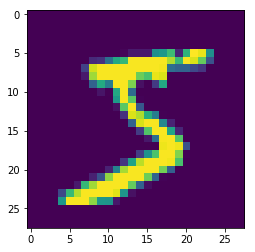

In [31]:
plt.imshow(X_train[0])
print(y_train[0])

In [7]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [8]:
X_train /= 255.
X_test /= 255.

In [9]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [11]:
model = Sequential()
model.add(Dense((64), activation="sigmoid", input_shape=(784,)))
model.add(Dense((10), activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.0287 - acc: 0.8377 - val_loss: 0.0142 - val_acc: 0.9141
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.0128 - acc: 0.9228 - val_loss: 0.0110 - val_acc: 0.9337
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0104 - acc: 0.9368 - val_loss: 0.0094 - val_acc: 0.9410
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.0089 - acc: 0.9463 - val_loss: 0.0084 - val_acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0079 - acc: 0.9527 - val_loss: 0.0077 - val_acc: 0.9519
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.0071 - acc: 0.9570 - val_loss: 0.0071 - val_acc: 0.9550
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0064 - acc: 0.9617 - val_loss: 0.0068 - val_acc: 0.9566
Epoch 8/10
60000/60000 [==============================] - 1s 